# Fashion MNIST Classification with pytorch


## Setup

Check the available GPU

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Imports

In [ ]:
import torch
import torch.nn
import torchvision
from torchvision.datasets import FashionMNIST
from torch.utils.data.dataloader import DataLoader
from collections import OrderedDict
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

### Constants

In [ ]:
root = 'data'
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## The Dataset
An MNIST-like dataset of 70,000 28x28 labeled fashion images
https://www.kaggle.com/datasets/zalando-research/fashionmnist

### Load dataset

In [ ]:
training_data = FashionMNIST(root = root,
                             train = True,
                             transform = torchvision.transforms.ToTensor(),
                             download = True)
test_data = FashionMNIST(root = root,
                             train = False,
                             transform = torchvision.transforms.ToTensor(),
                             download = True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17123506.17it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 347439.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6176722.05it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15205828.87it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(training_data),len(test_data)

(60000, 10000)

In [ ]:
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
image, label = training_data[0]
print(image.shape,':', label)

torch.Size([1, 28, 28]) : 9


In [ ]:
class_names = training_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
print(train_dataloader)

`DataLoader` returns an iterator, hence, we need to iterate over the dataloader to get data

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Shape of training image: {train_features.shape} [NCHW], label: {train_labels[0]}')
print(f'This is with a batch size of {batch_size}')

Shape of training image: torch.Size([32, 1, 28, 28]) [NCHW], label: 0
This is with a batch size of 32


### Visualize

Visualize the first 16 images

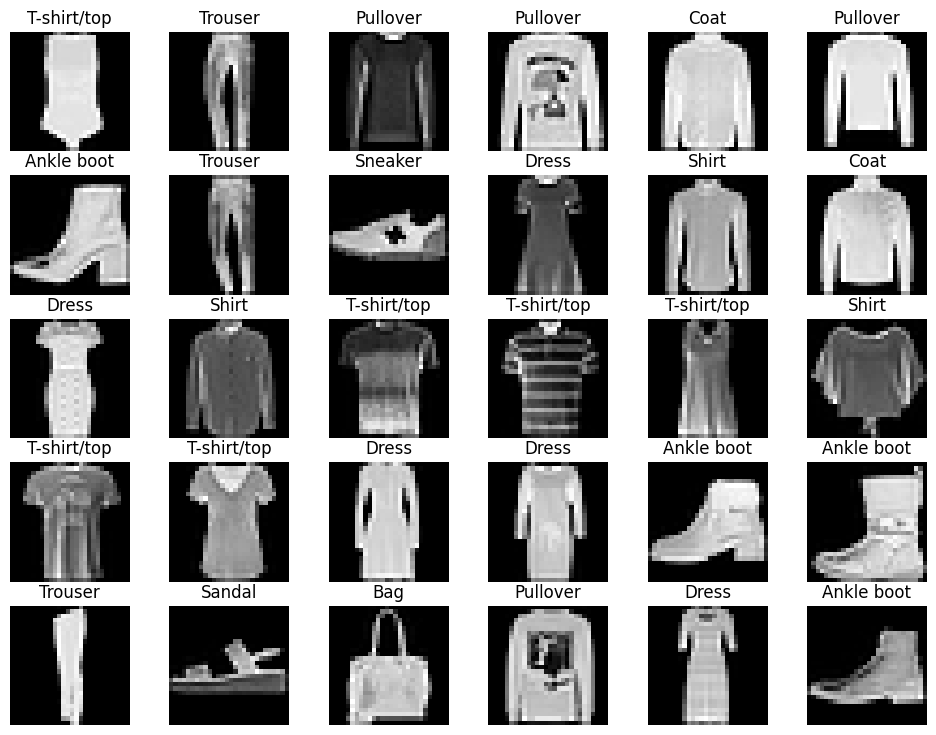

In [ ]:
w = 5
h = 6
fig = plt.figure(figsize=(12,9))
for i in range(h*w):
  image, label = train_features[i], train_labels[i]
  plt.subplot(w, h, i+1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis('off')
plt.show()

### Setup different variables

In [ ]:
channels, hight, width = image.shape
no_class = len(class_names)
hidden_units = 10

## Build Model

In [ ]:
tiny_vgg_model = torch.nn.Sequential(
                # Block 1
                 torch.nn.Conv2d(in_channels=channels,
                                 out_channels=hidden_units,
                                 kernel_size=3, stride=1, padding=1),
                 torch.nn.ReLU(),
                 torch.nn.Conv2d(in_channels=hidden_units,
                                 out_channels=hidden_units,
                                 kernel_size=3, stride=1, padding=1),
                 torch.nn.ReLU(),
                 torch.nn.MaxPool2d(kernel_size=2, stride=2), # Stride is by default the same as kernel size
                # Block 2
                 torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
                 torch.nn.ReLU(),
                 torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1),
                 torch.nn.ReLU(),
                 torch.nn.MaxPool2d(kernel_size=2),
                # Classifier
                 torch.nn.Flatten(),
                # Linear Layer
                 torch.nn.Linear(in_features=hidden_units * (hight/4) * (width / 4), out_features=no_class)
                 ).to(device)


In [ ]:
image = torch.randn((1,1,28,28)).to(device)
tiny_vgg_model(image).shape

torch.Size([1, 10])

## Train

In [ ]:
epochs = 25
lr = 0.001
optimizer = torch.optim.Adam(tiny_vgg_model.parameters(),lr= lr)
loss_fn = torch.nn.CrossEntropyLoss()


In [ ]:
tiny_vgg_model.train()
for epoch in range(epochs):
  print(f"Epoch {epoch}")
  for images, labels in tqdm(train_dataloader):
    # Forward pass
    y_hat = tiny_vgg_model(images.to(device))

    # Clear gradients
    optimizer.zero_grad()

    # Compute loss
    loss = loss_fn(y_hat, labels.to(device))

    # Compute gradients
    loss.backward()

    # Backprop
    optimizer.step()

Epoch 0


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 1


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 2


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 3


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 4


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 5


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 6


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 7


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 8


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 9


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 10


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 11


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 12


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 13


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 14


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 15


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 16


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 17


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 18


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 19


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 20


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 21


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 22


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 23


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 24


  0%|          | 0/1875 [00:00<?, ?it/s]

## Test

In [ ]:
loss = 0
tiny_vgg_model.eval()
with torch.inference_mode():
  for images, labels in tqdm(test_dataloader):
    # Forward pass
    y_hat = tiny_vgg_model(images.to(device))

    # Compute loss
    loss += loss_fn(y_hat, labels.to(device)).item()
loss /= len(test_dataloader)
print(f"Loss: {loss}")

  0%|          | 0/313 [00:00<?, ?it/s]

Loss: 0.2914678170182073


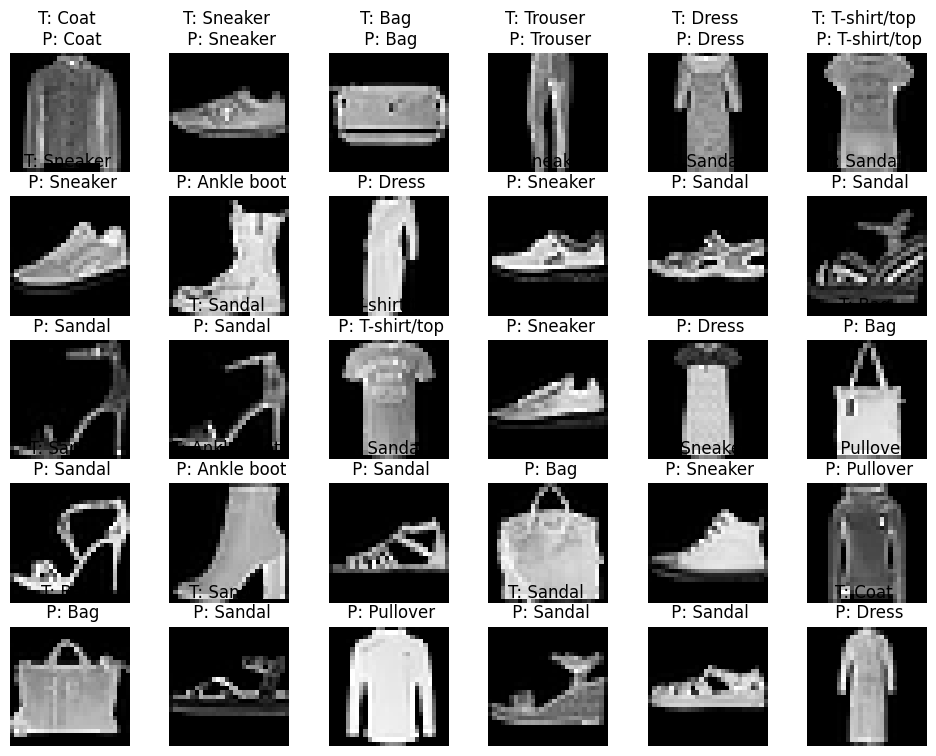

In [ ]:
test_features, test_labels = next(iter(test_dataloader))

w = 5
h = 6
fig = plt.figure(figsize=(12,9))
for i in range(h*w):
  image, label = test_features[i], test_labels[i]
  y_pred = tiny_vgg_model(image.unsqueeze(0).to(device))
  plt.subplot(w, h, i+1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f'T: {class_names[label]} \n P: {class_names[torch.argmax(y_pred).cpu()]}')
  plt.axis('off')
plt.show()